In [29]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import pickle
import h5py
import numpy as np
from tqdm import tqdm
from jax import config
config.update("jax_enable_x64", True)
import jax
import jax.numpy as jnp

import py21cmfast as p21c

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file('../matplotlibrc')

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [11]:
fileList = [os.environ['P21C_CACHE_DIR'] + '/test/' + item for item in os.listdir(os.environ['P21C_CACHE_DIR'] + '/test') if 'TsBox' in item]
rs_list = [h5py.File(fileName).attrs['redshift'] for fileName in fileList]

In [25]:
rn = "test_shell"
rec = np.load(f"../outputs/dm21cm/{rn}_records.npy", allow_pickle=True).item()
rec2 = np.load(f"../outputs/dm21cm/{rn}_records_extra.npy", allow_pickle=True).item()

In [ ]:
rec2['pc_shell_dep']

In [ ]:
plt.imshow(rec2['x_e_box'][-1][0])
plt.colorbar()

In [ ]:
plt.plot(rec['z'], rec['T_k'])
plt.loglog()

In [32]:
rec2.keys()

dict_keys(['i_z', 'x_e_box', 'x_H_box', 'T_k_box', 'dep_box', 'pc_shell_dep'])

In [27]:
step_shells = rec2['pc_shell_dep'][-1]

In [30]:
def r_vals_pc(BOX_LEN=64, HII_DIM=32, Rmax=p21c.global_params.R_XLy_MAX, n=p21c.global_params.NUM_FILTER_STEPS_FOR_Ts):
    L_FACTOR = 0.620350491
    R = L_FACTOR * BOX_LEN/HII_DIM
    R_factor = pow(Rmax/R, 1/n)
    r_vals = R * R_factor ** np.arange(n)
    return r_vals

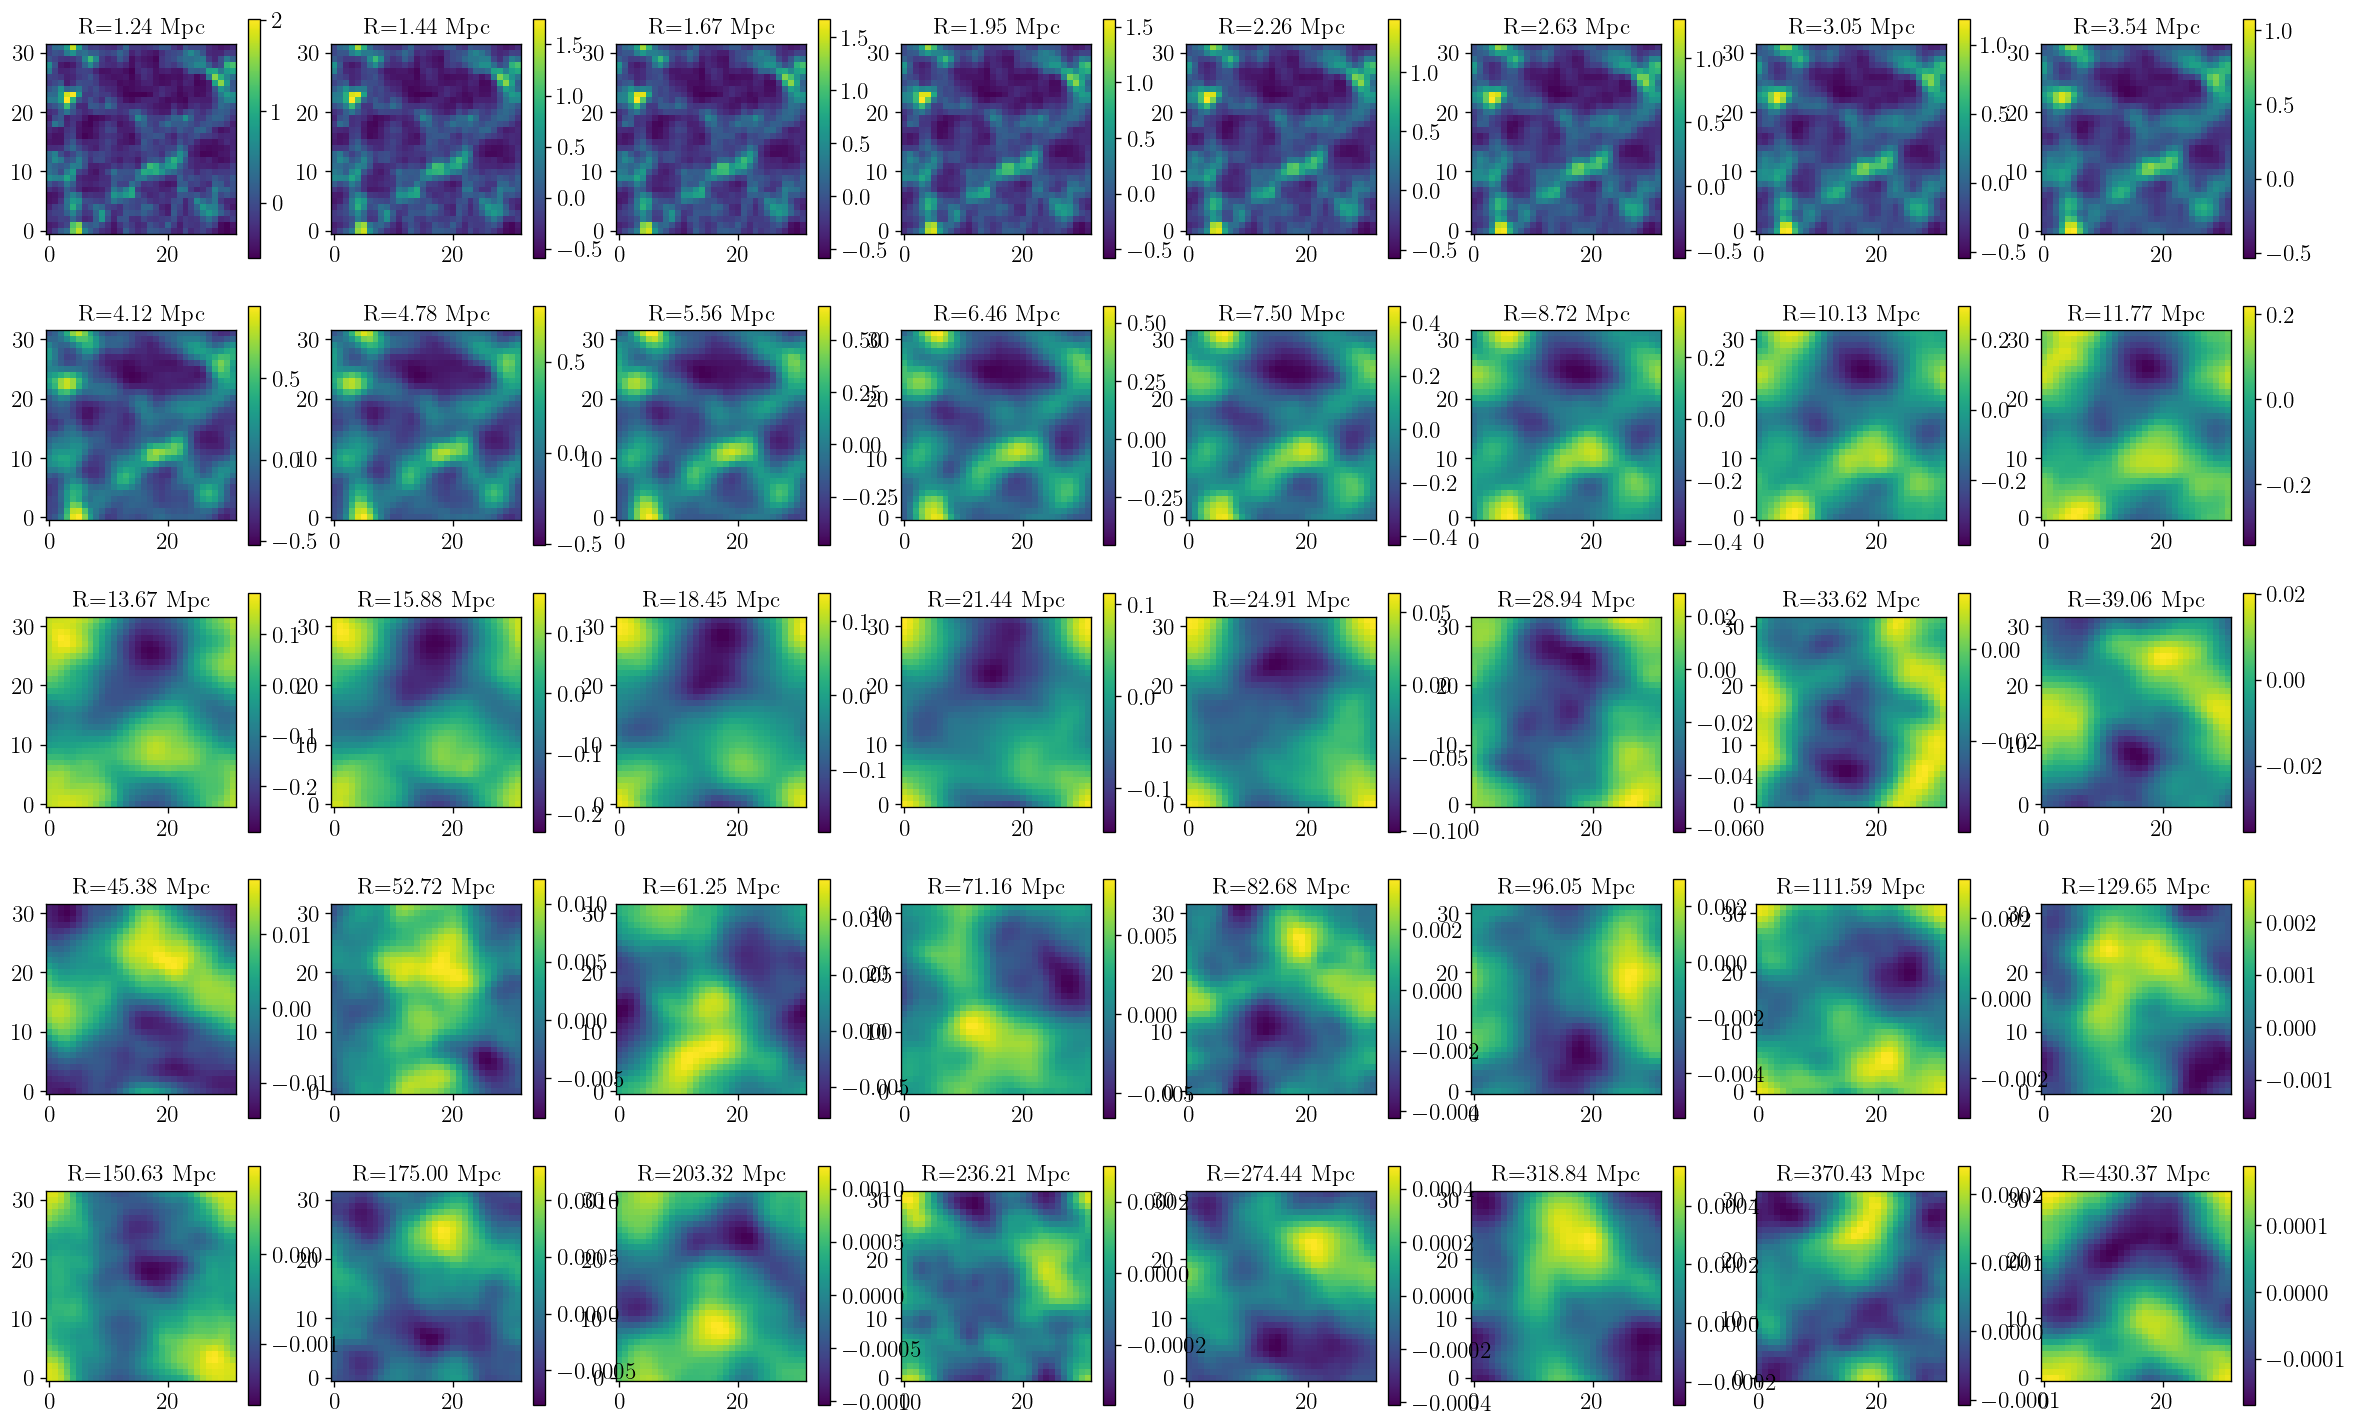

In [33]:
fig, axs = plt.subplots(5, 8, figsize=(24, 15))

r_vals = r_vals_pc()

for i in range(40):
    ax = axs.flatten()[i]
    im = ax.imshow(step_shells[i][0], origin='lower')
    ax.set(title=f"R={r_vals[i]:.2f} Mpc")
    fig.colorbar(im, ax=ax)